In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('flask/static/data/data_cleaned.csv', index_col=0)
group = list(data.columns[1:6])
bacteria = list(data.columns[6:])
data

,SampleID,Age,Sex,Nationality,Diversity,BMI_group,Actinomycetaceae,Aerococcus,Aeromonas,Akkermansia,...,Uncultured Clostridium (sensu stricto)les I,Uncultured Clostridium (sensu stricto)les II,Uncultured Mollicutes,Uncultured Selenomonadaceae,Veillonella,Vibrio,Weissella et rel.,Wissella et rel.,Xanthomonadaceae,Yersinia et rel.
0,Sample-1,28.0,male,US,5.76,severeobese,72.018955,36.677499,42.602327,1381.236854,...,1104.414062,1028.468474,521.322821,106.394227,211.821670,154.965223,171.075788,61.107101,77.708572,148.457166
1,Sample-2,24.0,female,US,6.06,obese,71.617440,35.093902,38.339812,2361.542624,...,18897.145365,10796.271198,4415.402080,56.550318,200.735634,167.467197,116.656049,55.221793,75.723312,148.153760
2,Sample-3,52.0,male,US,5.50,lean,76.788552,36.468459,41.049680,30042.118033,...,9941.426890,2382.601913,2705.456410,35.087364,143.295196,177.587051,137.614018,36.587206,78.451328,151.829451
3,Sample-4,22.0,female,US,5.87,underweight,74.153361,35.983472,40.919850,3886.400964,...,1707.346473,2881.873156,575.770921,35.909907,180.882271,205.570562,115.188297,44.524188,82.810934,152.548577
4,Sample-5,25.0,female,US,5.89,lean,77.065064,37.466006,42.746629,2195.020926,...,32454.018243,7598.565773,16017.026792,54.862005,223.830484,174.345496,138.353411,63.445514,86.347452,156.447511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,Sample-1168,50.0,female,Scandinavia,5.87,severeobese,80.159365,48.127519,53.322778,3531.064768,...,1152.148357,1079.644366,572.867552,105.781265,202.241941,175.000863,129.723653,95.382249,167.619096,164.413674
1168,Sample-1169,31.0,female,Scandinavia,5.87,overweight,77.041586,41.124915,60.337416,1588.769710,...,1119.355083,4217.160190,550.146756,38.349850,1620.277091,180.715381,140.147261,95.237119,79.833878,151.265463
1169,Sample-1170,31.0,female,Scandinavia,5.92,overweight,96.576576,45.196396,60.205546,1496.587435,...,1178.503874,1432.135564,579.136078,42.982044,567.559354,175.531380,151.295515,70.977901,97.864420,160.922460
1170,Sample-1171,52.0,male,Scandinavia,6.04,overweight,74.776047,38.270063,50.783378,33883.188767,...,1413.687897,25489.009881,560.543097,34.793285,195.680514,182.050884,126.790962,68.106051,98.715367,149.817332


### Sex 

In [3]:
male = data.loc[data['Sex'] == 'male']
female = data.loc[data['Sex'] == 'female']

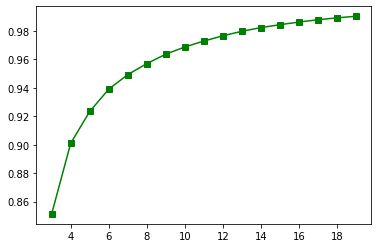

In [4]:
x = [i for i in range(3, 20)]
y = []
for i in range(3, 20):
    pca = PCA(n_components=i) 
    pca.fit(male.iloc[:,6:])
    y.append(sum(pca.explained_variance_ratio_)) # ratio of different components
plt.plot(x,y,'g-s')

In [5]:
# from line plot based on male and female group we can see that pca with 5 components can explain more than 90% bacteria data,
# and with increasing #components, less improvement of explaination.
# Therefore I choose n_components = 5
pca = PCA(n_components=5) 
pca.fit(male.iloc[:,6:])
reduced_male = pca.fit_transform(male.iloc[:,6:])
print('Ratio of 5 components of male:', pca.explained_variance_ratio_)
loadings_male = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix_male = pd.DataFrame(loadings_male, columns=['PC1','PC2','PC3','PC4','PC5'], index=bacteria)



pca.fit(female.iloc[:,6:])
reduced_female = pca.fit_transform(female.iloc[:,6:])
print('Ratio of 5 components of female:', pca.explained_variance_ratio_)
loadings_female = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix_female = pd.DataFrame(loadings_female, columns=['PC1','PC2','PC3','PC4','PC5'], index=bacteria)

Ratio of 5 components of male: [0.65867682 0.13555845 0.0570926  0.04963849 0.02237034]
Ratio of 5 components of female: [0.58155729 0.14862066 0.09344389 0.05810415 0.02757703]


In [6]:
display(loading_matrix_male)

,PC1,PC2,PC3,PC4,PC5
Actinomycetaceae,-0.591912,-3.585278,-4.372992,4.599128,0.569431
Aerococcus,-0.649338,-1.662400,-0.603305,1.673094,-0.723457
Aeromonas,-1.055653,-1.506257,0.260680,2.915775,-0.358341
Akkermansia,-607.764516,860.734448,-473.070157,120.082693,614.912936
Alcaligenes faecalis et rel.,3.521274,19.997434,14.629700,-17.790700,-2.152876
...,...,...,...,...,...
Vibrio,-2.356494,9.196514,-4.221407,2.088129,6.612183
Weissella et rel.,-1.989560,-3.465022,0.953968,0.573425,10.788458
Wissella et rel.,-1.426195,-2.101562,7.384795,11.328288,-0.550350
Xanthomonadaceae,8.399521,-2.848405,9.864282,-11.854805,6.052005


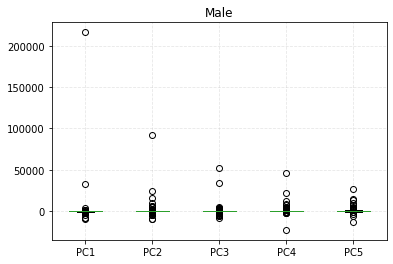

In [7]:
# use box plot to see if there are outliers, 
# which can be important bacteria for this component
loading_matrix_male.plot.box(title='Male')
plt.grid(linestyle="--", alpha=0.3)

In [8]:
pc = ['PC1','PC2','PC3','PC4','PC5']
for i in pc:
    dic = loading_matrix_male[i].to_dict()
    sorted_dic = sorted(dic.items(), key = lambda d:d[1], reverse = True)
    print('male',i,':', sorted_dic[0], '\n          ',sorted_dic[1])# the most important bacteria that positive correlated with male

male PC1 : ('Prevotella melaninogenica et rel.', 216370.25142134287) 
           ('Prevotella oralis et rel.', 32617.280647470645)
male PC2 : ('Oscillospira guillermondii et rel.', 92456.97386039127) 
           ('Sporobacter termitidis et rel.', 24433.83126949868)
male PC3 : ('Bacteroides vulgatus et rel.', 52364.39009656012) 
           ('Faecalibacterium prausnitzii et rel.', 33393.20640820028)
male PC4 : ('Faecalibacterium prausnitzii et rel.', 46558.958514901635) 
           ('Subdoligranulum variable at rel.', 21899.582447732526)
male PC5 : ('Subdoligranulum variable at rel.', 27280.842924079727) 
           ('Bacteroides vulgatus et rel.', 14067.17017986179)


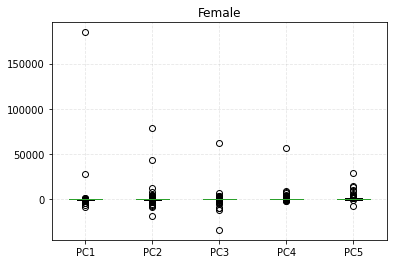

In [9]:
loading_matrix_female.plot.box(title='Female')
plt.grid(linestyle="--", alpha=0.3)

In [10]:
for i in pc:
    dic = loading_matrix_female[i].to_dict()
    sorted_dic = sorted(dic.items(), key = lambda d:d[1], reverse = True)
    print('female',i,':', sorted_dic[0], '\n            ',sorted_dic[1])# the most important bacteria that positive correlated with male
    

female PC1 : ('Prevotella melaninogenica et rel.', 184710.77821614128) 
             ('Prevotella oralis et rel.', 27808.948040108728)
female PC2 : ('Oscillospira guillermondii et rel.', 78274.0403748568) 
             ('Bacteroides vulgatus et rel.', 43559.45727840259)
female PC3 : ('Bacteroides vulgatus et rel.', 62514.12619949061) 
             ('Faecalibacterium prausnitzii et rel.', 7104.928019235765)
female PC4 : ('Faecalibacterium prausnitzii et rel.', 56544.84548762966) 
             ('Oscillospira guillermondii et rel.', 8756.897527529032)
female PC5 : ('Ruminococcus obeum et rel.', 28975.379152285528) 
             ('Coprococcus eutactus et rel.', 14718.88073317977)


### Nationality

In [11]:
nationality = list(set(data['Nationality']))
nationality

['Scandinavia', 'CentralEurope', 'US', 'EasternEurope', 'UKIE', 'SouthEurope']